In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, minmax_scale, robust_scale
matplotlib.rc('font',family='Malgun Gothic')


In [2]:
health_data = pd.read_csv("C:\\Users\\LG\\Desktop\\3조_HE~1\\health_data.csv" ,encoding="utf-8")
cell_data = pd.read_csv("C:\\Users\\LG\\Desktop\\3조_HE~1\\cell_img.csv" ,engine='python')

# Raw Data 확인

In [3]:
cell_data

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim,user_ID,Inspection equipment,Hosp
0,84358402,M,20.29,135.10,1297.0,14.34,0.10,0.13280,0.19800,0.1043,...,0.7813,0.0115,0.0246,0.0569,0.0189,0.0176,0.0051,1589,DSA-1,BDS_flu
1,843786,M,12.45,82.57,477.1,15.70,0.13,0.17000,0.15780,0.0809,...,0.8902,0.0075,0.0335,0.0367,0.0114,0.0217,0.0051,2406,DSA-2,BDS_flu
2,84458202,M,13.71,90.20,577.9,20.83,0.12,0.16450,0.09366,0.0599,...,1.3770,0.0088,0.0303,0.0249,0.0145,0.0149,0.0054,6991,DSA-3,BDS_flu
3,84501001,M,12.46,83.97,475.9,24.04,0.12,0.23960,0.22730,0.0854,...,1.5990,0.0071,0.0722,0.0774,0.0143,0.0179,0.0101,20622,DSA-4,BDS_flu
4,84799002,M,14.54,96.73,658.8,27.54,0.11,0.15950,0.16390,0.0736,...,1.0330,0.0056,0.0424,0.0474,0.0109,0.0186,0.0055,24488,F-1,BDS_flu
5,848406,M,14.68,94.74,684.5,20.13,0.10,0.07200,0.07395,0.0526,...,1.2400,0.0057,0.0116,0.0200,0.0111,0.0141,0.0021,57694,F-2,BDS_flu
6,84862001,M,16.13,108.10,798.8,20.68,0.12,0.20220,0.17220,0.1028,...,1.0730,0.0070,0.0250,0.0319,0.0130,0.0169,0.0041,87654,DSA-1,BDS_flu
7,849014,M,19.81,130.00,1260.0,22.15,0.10,0.10270,0.14790,0.0950,...,1.0170,0.0065,0.0189,0.0339,0.0152,0.0136,0.0020,105624,DSA-2,BDS_flu
8,8511133,M,15.34,102.50,704.4,14.26,0.11,0.21350,0.20770,0.0976,...,0.7096,0.0068,0.0533,0.0645,0.0225,0.0367,0.0044,112108,DSA-3,BDS_flu
9,851509,M,21.16,137.20,1404.0,23.04,0.09,0.10220,0.10970,0.0863,...,1.1270,0.0047,0.0126,0.0172,0.0104,0.0108,0.0020,112726,DSA-4,BDS_flu


# 결측치 확인

In [4]:
#결측치 확인
cell_data.isnull().sum()

Image ID                0
Diagnosis               0
Mean Radius             0
Mean Perimeter          6
Mean Area               0
Mean Texture            4
Mean Smoothness         0
Mean Compactness        6
Mean Concavity          0
Mean Concave Points     2
Mean Symmetry           1
Mean Fractal Dim        0
Max Radius              0
Max Perimeter           0
Max Area                0
Max Texture             0
Max Smoothness          0
Max Compactness         0
Max Concavity           0
Max Concave Points      0
Max Symmetry            0
Max Fractal Dim         0
SE Radius               0
SE Perimeter            0
SE Area                 0
SE Texture              0
SE Smoothness           0
SE Compactness          0
SE Concavity            0
SE Concave Points       0
SE Symmetry             0
SE Fractal Dim          0
user_ID                 0
Inspection equipment    0
Hosp                    0
dtype: int64

## 결측치 Column의 평균값 확인

In [5]:
cell_data["Mean Perimeter"].mean()

87.68506224066388

In [6]:
cell_data["Mean Texture"].mean()

18.693703703703683

In [7]:
cell_data["Mean Compactness"].mean()

0.09892460580912864

In [8]:
cell_data["Mean Concave Points"].mean()

0.04283673469387758

In [9]:
cell_data["Mean Symmetry"].mean()

0.17999024390243906

## 결측치 데이터 평균값으로 대체

In [11]:
cell_data=cell_data.fillna(cell_data.mean())
cell_data

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim,user_ID,Inspection equipment,Hosp
0,84358402,M,20.29,135.10,1297.0,14.340000,0.10,0.132800,0.19800,0.104300,...,0.7813,0.0115,0.0246,0.0569,0.0189,0.0176,0.0051,1589,DSA-1,BDS_flu
1,843786,M,12.45,82.57,477.1,15.700000,0.13,0.170000,0.15780,0.080900,...,0.8902,0.0075,0.0335,0.0367,0.0114,0.0217,0.0051,2406,DSA-2,BDS_flu
2,84458202,M,13.71,90.20,577.9,20.830000,0.12,0.164500,0.09366,0.059900,...,1.3770,0.0088,0.0303,0.0249,0.0145,0.0149,0.0054,6991,DSA-3,BDS_flu
3,84501001,M,12.46,83.97,475.9,24.040000,0.12,0.239600,0.22730,0.085400,...,1.5990,0.0071,0.0722,0.0774,0.0143,0.0179,0.0101,20622,DSA-4,BDS_flu
4,84799002,M,14.54,96.73,658.8,27.540000,0.11,0.159500,0.16390,0.073600,...,1.0330,0.0056,0.0424,0.0474,0.0109,0.0186,0.0055,24488,F-1,BDS_flu
5,848406,M,14.68,94.74,684.5,20.130000,0.10,0.072000,0.07395,0.052600,...,1.2400,0.0057,0.0116,0.0200,0.0111,0.0141,0.0021,57694,F-2,BDS_flu
6,84862001,M,16.13,108.10,798.8,20.680000,0.12,0.202200,0.17220,0.102800,...,1.0730,0.0070,0.0250,0.0319,0.0130,0.0169,0.0041,87654,DSA-1,BDS_flu
7,849014,M,19.81,130.00,1260.0,22.150000,0.10,0.102700,0.14790,0.095000,...,1.0170,0.0065,0.0189,0.0339,0.0152,0.0136,0.0020,105624,DSA-2,BDS_flu
8,8511133,M,15.34,102.50,704.4,14.260000,0.11,0.213500,0.20770,0.097600,...,0.7096,0.0068,0.0533,0.0645,0.0225,0.0367,0.0044,112108,DSA-3,BDS_flu
9,851509,M,21.16,137.20,1404.0,23.040000,0.09,0.102200,0.10970,0.086300,...,1.1270,0.0047,0.0126,0.0172,0.0104,0.0108,0.0020,112726,DSA-4,BDS_flu


In [12]:
#결측치 확인
cell_data.isnull().sum()

Image ID                0
Diagnosis               0
Mean Radius             0
Mean Perimeter          0
Mean Area               0
Mean Texture            0
Mean Smoothness         0
Mean Compactness        0
Mean Concavity          0
Mean Concave Points     0
Mean Symmetry           0
Mean Fractal Dim        0
Max Radius              0
Max Perimeter           0
Max Area                0
Max Texture             0
Max Smoothness          0
Max Compactness         0
Max Concavity           0
Max Concave Points      0
Max Symmetry            0
Max Fractal Dim         0
SE Radius               0
SE Perimeter            0
SE Area                 0
SE Texture              0
SE Smoothness           0
SE Compactness          0
SE Concavity            0
SE Concave Points       0
SE Symmetry             0
SE Fractal Dim          0
user_ID                 0
Inspection equipment    0
Hosp                    0
dtype: int64

# User_ID 번호를 이용하여 Cell_ImageData와 HealthData Merge

In [13]:
health_data = health_data.rename(columns = {'가입자일련번호': 'user_ID'})
cell_data=pd.merge(cell_data,health_data,on='user_ID')
cell_data

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석
0,84358402,M,20.29,135.10,1297.0,14.340000,0.10,0.132800,0.19800,0.104300,...,94.0,15.6,1.0,0.6,35.0,43.0,85.0,2.0,1,0.0
1,843786,M,12.45,82.57,477.1,15.700000,0.13,0.170000,0.15780,0.080900,...,36.0,14.4,1.0,0.9,878.0,304.0,339.0,3.0,0,NaN
2,84458202,M,13.71,90.20,577.9,20.830000,0.12,0.164500,0.09366,0.059900,...,75.0,15.3,1.0,0.7,34.0,45.0,95.0,3.0,0,NaN
3,84501001,M,12.46,83.97,475.9,24.040000,0.12,0.239600,0.22730,0.085400,...,119.0,16.5,2.0,0.9,114.0,154.0,161.0,3.0,0,NaN
4,84799002,M,14.54,96.73,658.8,27.540000,0.11,0.159500,0.16390,0.073600,...,178.0,17.1,4.0,0.8,28.0,30.0,119.0,2.0,0,NaN
5,848406,M,14.68,94.74,684.5,20.130000,0.10,0.072000,0.07395,0.052600,...,149.0,16.1,1.0,0.9,67.0,89.0,135.0,2.0,0,NaN
6,84862001,M,16.13,108.10,798.8,20.680000,0.12,0.202200,0.17220,0.102800,...,177.0,14.8,1.0,0.6,12.0,12.0,66.0,1.0,0,NaN
7,849014,M,19.81,130.00,1260.0,22.150000,0.10,0.102700,0.14790,0.095000,...,170.0,18.2,4.0,0.8,93.0,106.0,98.0,3.0,0,NaN
8,8511133,M,15.34,102.50,704.4,14.260000,0.11,0.213500,0.20770,0.097600,...,212.0,16.5,1.0,1.0,23.0,30.0,63.0,1.0,0,NaN
9,851509,M,21.16,137.20,1404.0,23.040000,0.09,0.102200,0.10970,0.086300,...,109.0,17.9,1.0,0.7,34.0,70.0,36.0,1.0,0,NaN


## frequency of cancer diagnosis


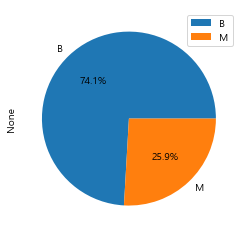

In [14]:
df_count = cell_data.groupby(['Diagnosis']).size()
df_count.plot.pie(y="Diagnosis",autopct="%.1f%%",)
plt.legend()

## Visualise distribution of data via histograms group by diagnosis


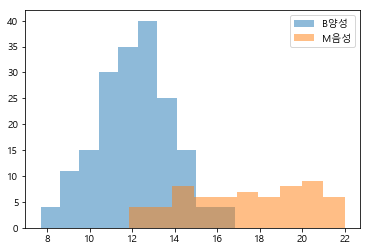

In [15]:
plt.hist(cell_data[cell_data["Diagnosis"] == 'B']["Mean Radius"], label = "B양성",alpha = 0.5)
plt.hist(cell_data[cell_data["Diagnosis"] == 'M']["Mean Radius"], label = "M음성",alpha = 0.5)
plt.legend()

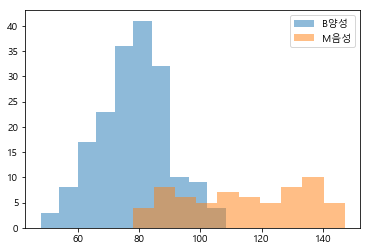

In [16]:
plt.hist(cell_data[cell_data["Diagnosis"] == 'B']["Mean Perimeter"], label = "B양성",alpha = 0.5)
plt.hist(cell_data[cell_data["Diagnosis"] == 'M']["Mean Perimeter"], label = "M음성",alpha = 0.5)
plt.legend()

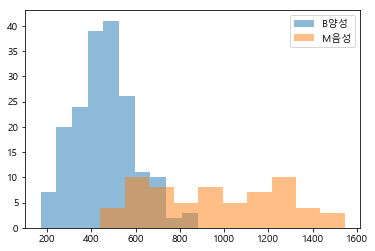

In [17]:
plt.hist(cell_data[cell_data["Diagnosis"] == 'B']["Mean Area"], label = "B양성",alpha = 0.5)
plt.hist(cell_data[cell_data["Diagnosis"] == 'M']["Mean Area"], label = "M음성",alpha = 0.5)
plt.legend()

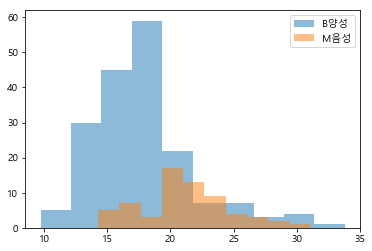

In [18]:
plt.hist(cell_data[cell_data["Diagnosis"] == 'B']["Mean Texture"], label = "B양성",alpha = 0.5)
plt.hist(cell_data[cell_data["Diagnosis"] == 'M']["Mean Texture"], label = "M음성",alpha = 0.5)
plt.legend()

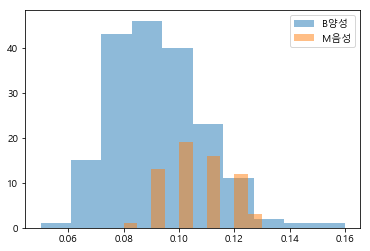

In [19]:
plt.hist(cell_data[cell_data["Diagnosis"] == 'B']["Mean Smoothness"], label = "B양성",alpha = 0.5)
plt.hist(cell_data[cell_data["Diagnosis"] == 'M']["Mean Smoothness"], label = "M음성",alpha = 0.5)
plt.legend()

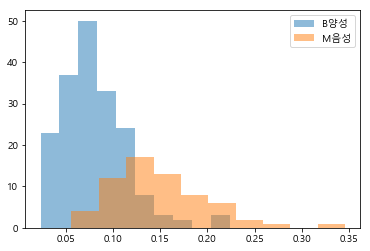

In [20]:
plt.hist(cell_data[cell_data["Diagnosis"] == 'B']["Mean Compactness"], label = "B양성",alpha = 0.5)
plt.hist(cell_data[cell_data["Diagnosis"] == 'M']["Mean Compactness"], label = "M음성",alpha = 0.5)
plt.legend()

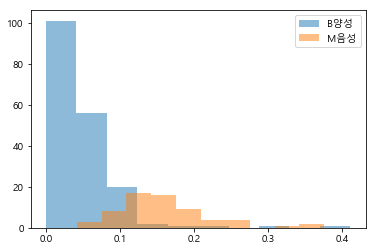

In [21]:
plt.hist(cell_data[cell_data["Diagnosis"] == 'B']["Mean Concavity"], label = "B양성",alpha = 0.5)
plt.hist(cell_data[cell_data["Diagnosis"] == 'M']["Mean Concavity"], label = "M음성",alpha = 0.5)
plt.legend()

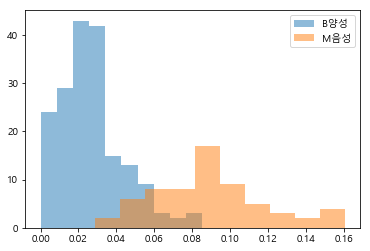

In [22]:
plt.hist(cell_data[cell_data["Diagnosis"] == 'B']["Mean Concave Points"], label = "B양성",alpha = 0.5)
plt.hist(cell_data[cell_data["Diagnosis"] == 'M']["Mean Concave Points"], label = "M음성",alpha = 0.5)
plt.legend()

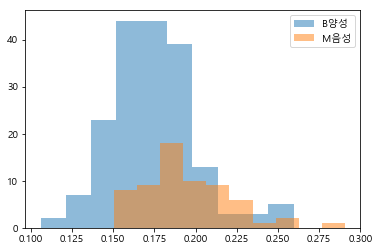

In [23]:
plt.hist(cell_data[cell_data["Diagnosis"] == 'B']["Mean Symmetry"], label = "B양성",alpha = 0.5)
plt.hist(cell_data[cell_data["Diagnosis"] == 'M']["Mean Symmetry"], label = "M음성",alpha = 0.5)
plt.legend()

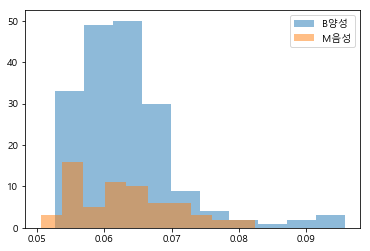

In [24]:
plt.hist(cell_data[cell_data["Diagnosis"] == 'B']["Mean Fractal Dim"], label = "B양성",alpha = 0.5)
plt.hist(cell_data[cell_data["Diagnosis"] == 'M']["Mean Fractal Dim"], label = "M음성",alpha = 0.5)
plt.legend()

In [27]:
cell_data.head()
#cell_data_num=cell_data.select_dtypes(include = 'object')

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석
0,84358402,M,20.29,135.10,1297.0,14.34,0.10,0.1328,0.19800,0.1043,...,94.0,15.6,1.0,0.6,35.0,43.0,85.0,2.0,1,0.0
1,843786,M,12.45,82.57,477.1,15.70,0.13,0.1700,0.15780,0.0809,...,36.0,14.4,1.0,0.9,878.0,304.0,339.0,3.0,0,NaN
2,84458202,M,13.71,90.20,577.9,20.83,0.12,0.1645,0.09366,0.0599,...,75.0,15.3,1.0,0.7,34.0,45.0,95.0,3.0,0,NaN
3,84501001,M,12.46,83.97,475.9,24.04,0.12,0.2396,0.22730,0.0854,...,119.0,16.5,2.0,0.9,114.0,154.0,161.0,3.0,0,NaN
4,84799002,M,14.54,96.73,658.8,27.54,0.11,0.1595,0.16390,0.0736,...,178.0,17.1,4.0,0.8,28.0,30.0,119.0,2.0,0,NaN


## Visualise distribution of data via box plots group by diagnois(진행중)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AED1737C50>,
      dtype=object)

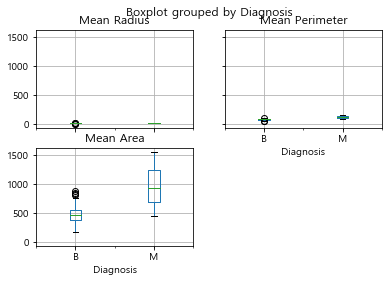

In [28]:
cell_data.boxplot(column=["Mean Radius","Mean Perimeter","Mean Area"],by="Diagnosis")
#plt.hist(df_raw[df_raw["Diagnosis"] == 'M']["Mean Perimeter"], label = "M",alpha = 0.5)